### TITANIC PREDICTION

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

* Read the Dataset

In [2]:
train_set = pd.read_csv('train.csv', index_col = 'PassengerId')
test_set = pd.read_csv('test.csv', index_col = 'PassengerId')

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Dataset Overview
There is 891 entries

Columns with missing values: 'Age', 'Cabin', 'Embarked'

Variable Notes

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

### Analyze Data
Target: 'Survived'

Column Data type:

Numerical:

* Discrete data:   'Age'
* Continuous data: 'Fare'

Categorical:

* Nominal data: 'Survived', 'Sex', 'Ticket', 'Embarked', 'SibSp', 'Parch',
* Ordinal data: 'Pclass'

Special: 'Name', 'Ticket', 'Cabin'

Missing Values columns: Cabin >> Age > Embarked 

In [4]:
numerical_col = [ 'Age', 'Fare']
categorical_col = ['SibSp', 'Parch', 'Sex', 'Embarked', 'Pclass']
train_set['Survived'] = train_set['Survived'].astype('category')

train_set[categorical_col] = train_set[categorical_col].astype('category')
test_set[categorical_col] = test_set[categorical_col].astype('category')


In [5]:
train_set.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [6]:
train_set.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


### Visualize Data

Data distribution

In [7]:
train_set['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Numerical Data Distribution

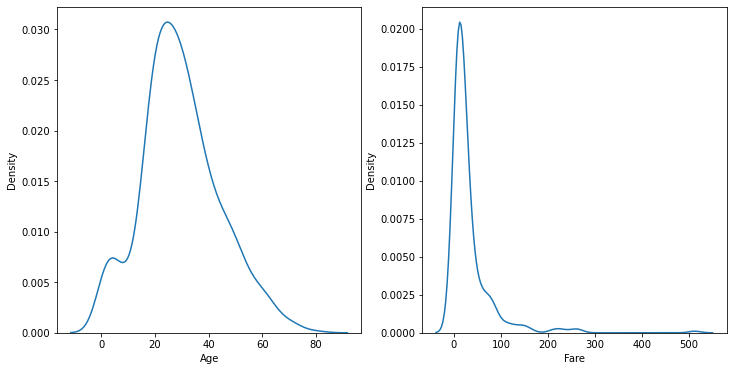

In [37]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 6))
for i in range (2):
    ax_i = ax[i]
    sns.kdeplot(data = train_set, x = numerical_col[i], ax = ax_i)
plt.show()

Categorical Data Distribution

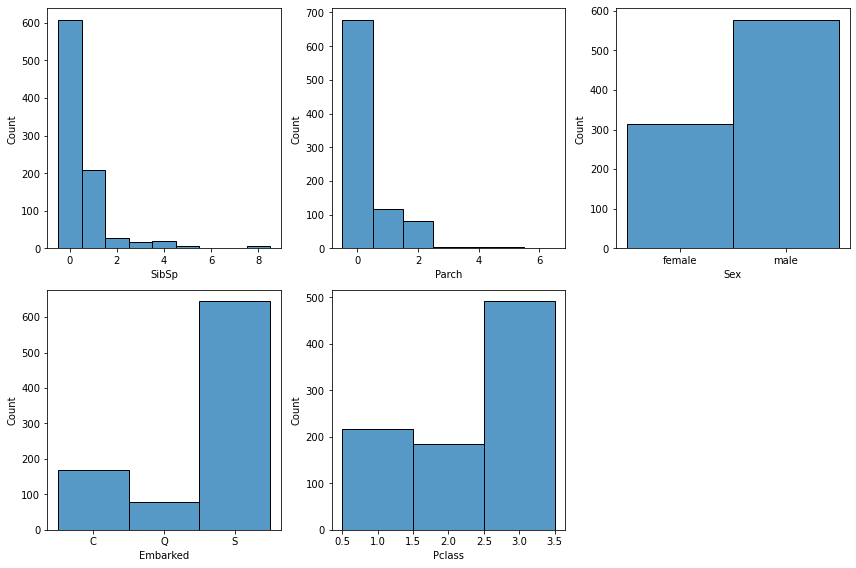

In [23]:
n_row = 2
n_col = 3

fig, ax = plt.subplots(nrows= n_row, ncols= n_col, figsize = (n_col*4, n_row*4))

for r in range(n_row):
    for c in range(n_col):
        i = r*n_col + c
        if i < len(categorical_col):
            ax_i = ax[r, c]
            sns.histplot(data = train_set, x = categorical_col[i], ax = ax_i)
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

* Affection of Features

Numerical Columns

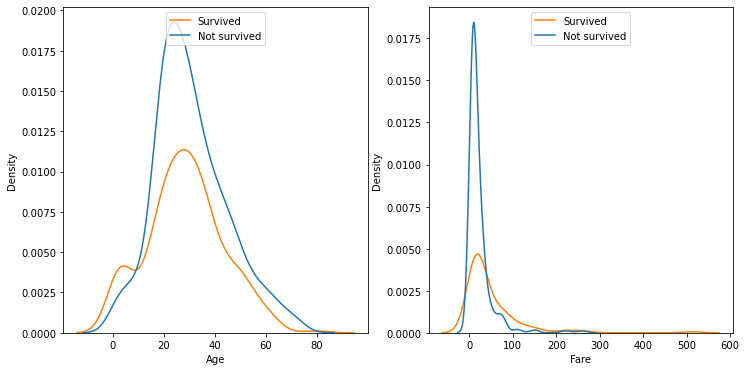

In [32]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize = (12, 6))
for i in range(2):
    ax_i = ax[i]
    sns.kdeplot(data = train_set, x = numerical_col[i], ax = ax_i, hue = 'Survived')
    ax_i.legend(title = '', loc = 'upper center', labels = ['Survived', 'Not survived'])

plt.show()


Categorical Columns

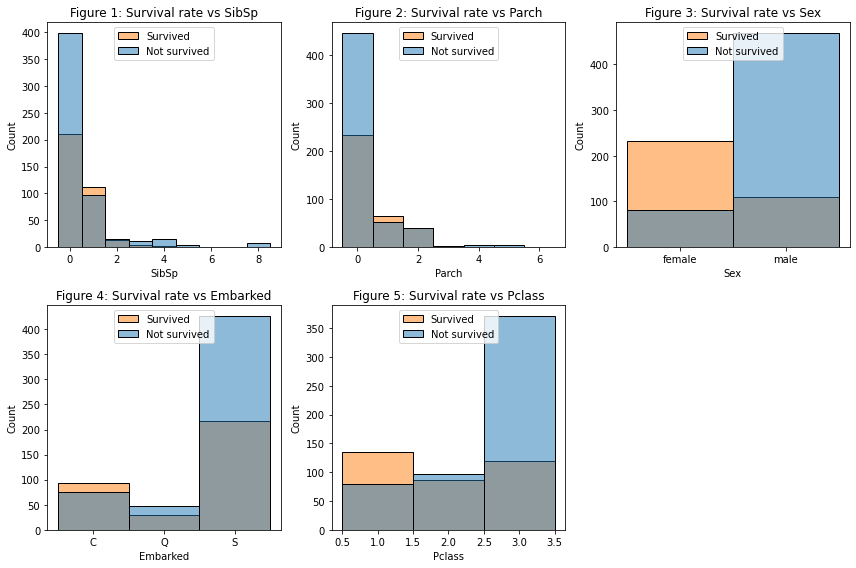

In [36]:

fig, ax = plt.subplots(nrows= n_row, ncols= n_col, figsize = (n_col*4, n_row*4))

for r in range(n_row):
    for c in range(n_col):
        i = r*n_col + c
        if i < len(categorical_col):
            ax_i = ax[r, c]
            sns.histplot(data = train_set, x = categorical_col[i], hue = 'Survived', ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: Survival rate vs {categorical_col[i]}')
            ax_i.legend(title = '', loc = 'upper center', labels = ['Survived', 'Not survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()            
plt.show()

In [ ]:
print(categorical_col)

['SibSp', 'Parch', 'Sex', 'Embarked', 'Pclass']
